In [1]:
import numpy as np
import sklearn 
import pandas as pd
import xgboost as xg
import altair as alt
import nbformat
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import SelectPercentile, chi2

In [2]:
sharktank = pd.read_csv('Shark Tank US dataset.csv',  encoding= 'unicode_escape')

In [3]:
def print_dtypes(df):
    """
    Prints the data type of each column in a pandas DataFrame.

    Args:
        df (pandas.DataFrame): The pandas DataFrame to print.

    Returns:
        None
    """
    print("Column\t\tData Type")
    for col in df.columns:
        print(f"{col}\t\t{df[col].dtype}")

print_dtypes(sharktank)

Column		Data Type
Season Number		int64
Episode Number		int64
Pitch Number		int64
Startup Name		object
Industry		object
Business Description		object
Pitchers Gender		object
Pitchers State		object
Pitchers City		object
Entrepreneur Names		object
Company Website		object
Multiple Entrepreneurs		float64
Original Ask Amount		object
Original Offered Equity		float64
Valuation Requested		object
Got Deal		int64
Total Deal Amount		object
Total Deal Equity		float64
Deal Valuation		object
Number of sharks in deal		float64
Investment Amount Per Shark		float64
Royalty Deal		float64
Loan		float64
Barbara Corcoran Investment Amount		float64
Mark Cuban Investment Amount		float64
Lori Greiner Investment Amount		float64
Robert Herjavec Investment Amount		float64
Daymond John Investment Amount		float64
Kevin O Leary Investment Amount		float64
Guest Investment Amount		float64
BarbaraCorcoran Present		float64
MarkCuban Present		float64
LoriGreiner Present		float64
RobertHerjavec Present		float64
DaymondJohn 

In [4]:
sharktank = sharktank.replace(',','', regex=True)


In [5]:

import pandas as pd

def classify_float(df):
    for column in df.columns:
        if df[column].dtype == 'int64' or df[column].dtype == 'float64':
            df[column] = df[column].astype(float)
    return df



In [6]:
def classify_categorical(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column] = pd.Categorical(df[column])
        return df

In [7]:
new_df = sharktank.copy()
new_df = classify_float(new_df)
new_df = classify_categorical(new_df)

In [8]:
float_cols = ['Total Deal Amount', 'Valuation Requested', 'Deal Valuation']

for col in float_cols:
    sharktank[col] = pd.to_numeric(sharktank[col], errors='coerce')

sharktank['Total Deal Amount'] = sharktank['Total Deal Amount'].astype("float")


In [9]:
sharktank['Deal Valuation'] = sharktank['Deal Valuation'].astype("float")
sharktank['Original Ask Amount'] = sharktank['Original Ask Amount'].astype("float")

In [10]:
print_dtypes(new_df)

Column		Data Type
Season Number		float64
Episode Number		float64
Pitch Number		float64
Startup Name		object
Industry		object
Business Description		object
Pitchers Gender		object
Pitchers State		object
Pitchers City		object
Entrepreneur Names		object
Company Website		object
Multiple Entrepreneurs		float64
Original Ask Amount		object
Original Offered Equity		float64
Valuation Requested		object
Got Deal		float64
Total Deal Amount		object
Total Deal Equity		float64
Deal Valuation		object
Number of sharks in deal		float64
Investment Amount Per Shark		float64
Royalty Deal		float64
Loan		float64
Barbara Corcoran Investment Amount		float64
Mark Cuban Investment Amount		float64
Lori Greiner Investment Amount		float64
Robert Herjavec Investment Amount		float64
Daymond John Investment Amount		float64
Kevin O Leary Investment Amount		float64
Guest Investment Amount		float64
BarbaraCorcoran Present		float64
MarkCuban Present		float64
LoriGreiner Present		float64
RobertHerjavec Present		float64
Daym

In [11]:
to_category_type = ['Industry', 'Pitchers Gender','Pitchers State', 'Pitchers City', 'Season Number', 'BarbaraCorcoran Present', 'MarkCuban Present', 'LoriGreiner Present', 'RobertHerjavec Present', 'DaymondJohn Present', 'KevinOLeary Present', 'KevinHarrington Present']

def convert_to_categorical(df, categorical_cols):
    """
    Converts specified columns in a Pandas DataFrame to categorical data type.

    Parameters:
    df (pandas.DataFrame): The DataFrame to modify.
    categorical_cols (list): A list of column names to convert to categorical data type.

    Returns:
    pandas.DataFrame: The modified DataFrame.
    """
    # Make a copy of the DataFrame to avoid modifying the original
    df_copy = df.copy()

    # Convert specified columns to categorical data type
    for col in categorical_cols:
        df_copy[col] = df_copy[col].astype('category')

    # Return the modified DataFrame
    return df_copy

new_df = convert_to_categorical(sharktank, to_category_type)

In [12]:
def convert_to_num(df, num_columns):
    """
    Converts specified columns in a Pandas DataFrame to categorical data type.

    Parameters:
    df (pandas.DataFrame): The DataFrame to modify.
    categorical_cols (list): A list of column names to convert to categorical data type.

    Returns:
    pandas.DataFrame: The modified DataFrame.
    """
    # Make a copy of the DataFrame to avoid modifying the original
    df_copy = df.copy()

    # Convert specified columns to categorical data type
    for col in num_columns:
        df_copy[col] = df_copy[col].astype('category')

    # Return the modified DataFrame
    return df_copy

new_df = convert_to_num(sharktank, to_category_type)

In [13]:
X = new_df.drop(['Got Deal', 'Guest Name', 'Notes', 'Company Website'], axis=1)
y = new_df['Got Deal']

In [14]:
dtypes_to_select = ['float64']
numerical = list(new_df.select_dtypes(include=dtypes_to_select).columns)
print(f"Numerical columns are: {numerical}")

Numerical columns are: ['Multiple Entrepreneurs', 'Original Ask Amount', 'Original Offered Equity', 'Valuation Requested', 'Total Deal Amount', 'Total Deal Equity', 'Deal Valuation', 'Number of sharks in deal', 'Investment Amount Per Shark', 'Royalty Deal', 'Loan', 'Barbara Corcoran Investment Amount', 'Mark Cuban Investment Amount', 'Lori Greiner Investment Amount', 'Robert Herjavec Investment Amount', 'Daymond John Investment Amount', 'Kevin O Leary Investment Amount', 'Guest Investment Amount']


In [15]:
dtypes_to_select = ['category']
categorical = list(new_df.select_dtypes(include=dtypes_to_select).columns)
print(f"Categorical columns are: {categorical}")

Categorical columns are: ['Season Number', 'Industry', 'Pitchers Gender', 'Pitchers State', 'Pitchers City', 'BarbaraCorcoran Present', 'MarkCuban Present', 'LoriGreiner Present', 'RobertHerjavec Present', 'DaymondJohn Present', 'KevinOLeary Present', 'KevinHarrington Present']


In [16]:
numeric_tranformer = Pipeline(
    steps = [( "imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_transformer = Pipeline(
    steps=[
    ("encoder", OneHotEncoder(handle_unknown='ignore')),
    ("selector", SelectPercentile(chi2, percentile=50)),
    ]
)


preprocessor = ColumnTransformer(
    transformers=[
    ("num", numeric_tranformer, numerical),
    ("cat", categorical_transformer, categorical),
    ]
)

In [17]:
from sklearn.svm import SVC

In [18]:
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", SVC(probability=True))]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.889


In [19]:
clf.predict_proba(X_test)

array([[4.10347371e-06, 9.99995897e-01],
       [4.62533385e-01, 5.37466615e-01],
       [7.49166141e-01, 2.50833859e-01],
       [8.04992203e-01, 1.95007797e-01],
       [6.02447663e-01, 3.97552337e-01],
       [1.86114626e-01, 8.13885374e-01],
       [5.13643455e-02, 9.48635655e-01],
       [4.43522637e-01, 5.56477363e-01],
       [1.20866564e-09, 9.99999999e-01],
       [9.22044514e-01, 7.79554863e-02],
       [5.88479585e-01, 4.11520415e-01],
       [9.08433908e-01, 9.15660920e-02],
       [9.55050288e-01, 4.49497115e-02],
       [4.49303567e-03, 9.95506964e-01],
       [9.28156835e-01, 7.18431652e-02],
       [2.59215098e-02, 9.74078490e-01],
       [9.04643195e-01, 9.53568053e-02],
       [1.56158366e-05, 9.99984384e-01],
       [3.87300738e-01, 6.12699262e-01],
       [9.76907803e-01, 2.30921975e-02],
       [9.05572186e-01, 9.44278138e-02],
       [9.79999397e-01, 2.00006033e-02],
       [9.58190627e-01, 4.18093728e-02],
       [9.60107431e-01, 3.98925694e-02],
       [2.306018

In [20]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report

In [21]:
prediction = clf.predict(X_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87        79
           1       0.96      0.85      0.90       120

    accuracy                           0.89       199
   macro avg       0.88      0.90      0.89       199
weighted avg       0.90      0.89      0.89       199



In [22]:
print(prediction)

print(confusion_matrix(y_test, prediction))
print(f1_score(y_test, prediction))

[1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 1
 1 0 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0
 0 1 0 1 1 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 0
 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 0
 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1
 1 1 0 1 0 0 1 1 1 1 0 1 1 1]
[[ 75   4]
 [ 18 102]]
0.9026548672566371


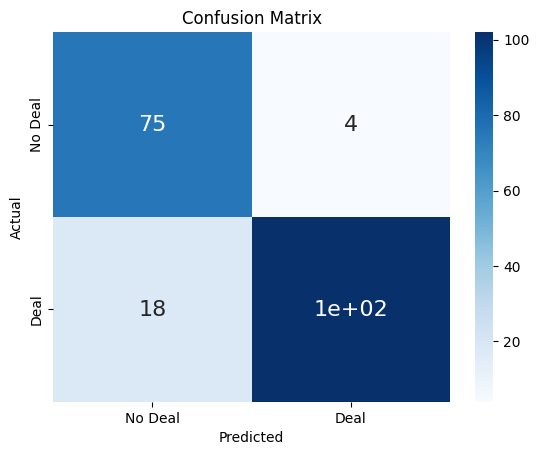

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

labels = ['No Deal', 'Deal']

cm = confusion_matrix(y_test, prediction)

sns.heatmap(cm, annot=True, cmap='Blues', xticklabels = labels, yticklabels = labels, annot_kws={"size": 16})


plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

In [24]:
from sklearn import svm, datasets

### User Input Model

In [25]:
user_input = input("Enter industry, city, gender, and state")

In [26]:
user_input = user_input.split(',')
user_input = [str(i) for i in user_input]

# Preprocess user responses
user_input = [user_input]

# Make predictions
prediction = clf.predict(user_input)

ValueError: X has 1 features, but ColumnTransformer is expecting 35 features as input.

In [ ]:
if prediction == 0:
    print("No deal")
else:
    print("Deal")

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()